# 强化学习

## 概念

+ 强化学习通常用马尔科夫决策来描述：机器处于环境E中，状态空间为X，其中每个状态$x \in X$是机器感知到的环境的描述，如在种瓜任务上这就是当前瓜苗长势的描述；机器能采取的动作构成了动作空间A，如种瓜任务中的浇水、施不同的肥等多种可供选择的动作；若每个动作a作用在当天状态x上，则潜在的转移函数P将使得环境从当前状态按照每种概率转移到另外一个状态，如瓜苗状态缺水，若选择浇水，则瓜苗有一定概率恢复健康，也有一定的概率无法恢复；在转移到另外的一个状态的同时，环境会根据潜在的奖赏函数R反馈给机器一个奖赏，如健康对应奖赏+1，瓜苗凋零对应奖赏-10，最终种出来好瓜对应奖赏+100.
+ 综合起来，强化学习任务对应了四元组 $E=\langle X, A, P, R\rangle$,其中$P : X \times A \times X \mapsto \mathbb{R}$指定了状态转移概率，$R : X \times A \times X \mapsto \mathbb{R}$指定了奖赏；在有的应用中，奖赏函数可能仅与状态转移有关，即$R : X \times X \mapsto \mathbb{R}$

![](./强化学习.png)

## 强化学习与监督学习的差别

+ 强化学习的“状态”对应监督学习的中的“示例”，“动作”对应为“标记”，则可看出强化学习中的“策略”实际上就相当于监督学习中的“分类器”或“回归器”，模型的形式上并无差别。
+ 在强化学习中并没有监督学习中的有标记样本（即“示例-标记”对），换而言之，没有人直接告诉机器在什么状态下应该做什么动作，只有等到最终的结果揭晓，才能通过“反思”之前的动作是否正确来进行学习。因此强化学习在某种意义上可看作具有“延迟标记信息”的监督学习问题

强化学习要求代理去探索环境，然后对状态进行评估，在每一个状态下代理可以选择多种行为，但是得到的奖励是无法表明当前的选择是正确的还是错误的，得到的只是一个分数。监督学习的标签可以给代理简洁明了的正误判断，并且在代理在对环境充分的探索前即在每一种状态下选择的每个行为的次数不够多时，无法充分求期望，并且在行为之间也无法进行对比择优。但是当监督学习的标签信息有噪声干扰或者是利用一些行为学习 获得到的标签的时候，强化学习的代理与环境直接交互获取到的信息是更加可靠。

# K-摇臂赌博机

## 探索和利用
+ 探索，将所有的机会平均分配给每个摇臂，最后以每个摇臂的各自平均吐币概率作为其奖赏的期望的近似估计
+ 利用，选择当下执行奖赏最大的动作，若多个动作的奖赏最优，则从中间随机选取一个。
+ “仅探索”能很好的评估每个摇臂的奖赏，却会失去很多选择最优摇臂的机会；“仅利用”法则想法，没有很好的估计每个摇臂的期望奖赏，很可能经常选不到最优的摇臂。两种方法都很难以使最终的累计奖赏最大化。

## $\epsilon$-贪心

+ 贪心法基于一个概率来对探索和利用进行折中，每次尝试时，以$\epsilon$的概率进行探索，即以均匀概率随机选取一个摇臂；以$1-\epsilon$的概率进行利用，即选择当前平均奖赏最高的摇臂（若有多个，则随机选取一个）

## Softmax

+ Softmax算法基于当前已知的摇臂平均奖赏来探索和利用进行折中。若个摇臂的平均奖赏相当，则选取各摇臂的概率也相当；若某些摇臂的平均奖赏明显高于其他摇臂，则他们被选取的概率也明显提高。

## UCB
![](./强化学习1.png)

+ 相同点，随着执行次数的增加，执行的摇臂的选取趋近于仅利用
+ 不同点：UCB采用奖赏的置信区间进行处理；贪心法采用一定的概率进行探索或利用；Softmax采用摇臂的平均奖赏作为选择的方式。

+ 相同点：都能实现探索和利用的折中选取。 
+ 不同点： 
    1. UCB 方法并没有参数，不需要对参数进行初始估计和调整。 
    2. UCB 方法中的UC(k) 一项，nk 初始值为 0，作为分母会导致每个摇臂的值为无穷大。那么可以看出UCB 方法会先将每一个摇臂都尝试一次，也就相当于一次” 全探索”。 
    3. UCB 方法中摇臂选取全部由前面选择的摇臂的奖赏值决定，而不是概率。

![](./强化学习2.png)
基于模型的强化学习： 
优点： 
- 可以用有监督学习方法有效地学习模型 
- 可以推理出模型的不确定性

缺点： 
- 先学习模型，然后再构建值函数，导致会有两种估计误差

In [4]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)


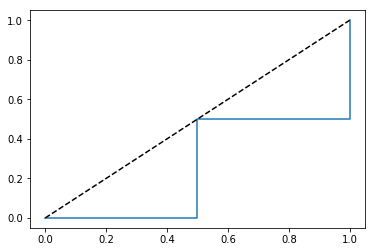

In [7]:
plt.plot(tpr, fpr)
plt.plot([0, 1], [0, 1], 'k--')